# Parcial 3 - Inteligencia Artificial

### Temas abordados en el corte

1. Henry Saenz
2. Daniel Mendoza
3. Bryam Villalobos

# 1. Análisis Exploratorio de los datos

## 1.1 Preparación y Limpieza de los datos

### 1.1.1 Instalar paquetes necesarios

In [52]:
!pip install ucimlrepo

In [2]:
!pip install scikit-plot

In [3]:
!pip install scikit-learn

In [4]:
!pip install tensorflow

In [53]:
import pandas as pd
from ucimlrepo import fetch_ucirepo
import numpy as np
import tensorflow as tf
import sklearn as skl
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chisquare
from scipy import stats
from scikitplot.metrics import plot_roc, plot_confusion_matrix
import warnings
from os import altsep
from scipy.stats import kstest
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import pearsonr
from scipy.stats import levene
from scipy.stats import f_oneway
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score,classification_report, precision_score, recall_score
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense,Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import  Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings('ignore')


### 1.1.2 Importar datos

Se extraen los datos del repositorio desde la página oficial de la universidad que los publicó para ser modelados en el trabajo propuesto. Se observan dos conjuntos de datos iniciales; features y targets.

- **Features** incluye las características iniciales de los datos y necesarias para el modelamiento de los mismos e incluye variables desde sexo, longitud, diametro, peso hasta edad y demás características específicas que serán los predictores sobre la variable de influencia. Inlcuye un link de acceso al repositorio de la investigación principal.

- **Targets** Contiene la descripción específica de la variable sobre la que se tiene interés en predecir, es decir, de los anillos que posee cada abalon.

In [54]:
# fetch dataset
abalone = fetch_ucirepo(id=1)

# data (as pandas dataframes)
x = abalone.data.features
y = abalone.data.targets

x = pd.concat([x, y], axis=1)
x1 = x.copy()
y1 = y.copy()

# metadata
print("La metadata del conjunto de datos es: ", abalone.metadata)

# variable information
print(abalone.variables)

La metadata del conjunto de datos es:  {'uci_id': 1, 'name': 'Abalone', 'repository_url': 'https://archive.ics.uci.edu/dataset/1/abalone', 'data_url': 'https://archive.ics.uci.edu/static/public/1/data.csv', 'abstract': 'Predict the age of abalone from physical measurements', 'area': 'Biology', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Tabular'], 'num_instances': 4177, 'num_features': 8, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['Rings'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C55C7W', 'creators': ['Warwick Nash', 'Tracy Sellers', 'Simon Talbot', 'Andrew Cawthorn', 'Wes Ford'], 'intro_paper': None, 'additional_info': {'summary': 'Predicting the age of abalone from physical measurements.  The age of abalone is determined by cutting the shell through the cone, staining it, and counting the n

In [7]:
x.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


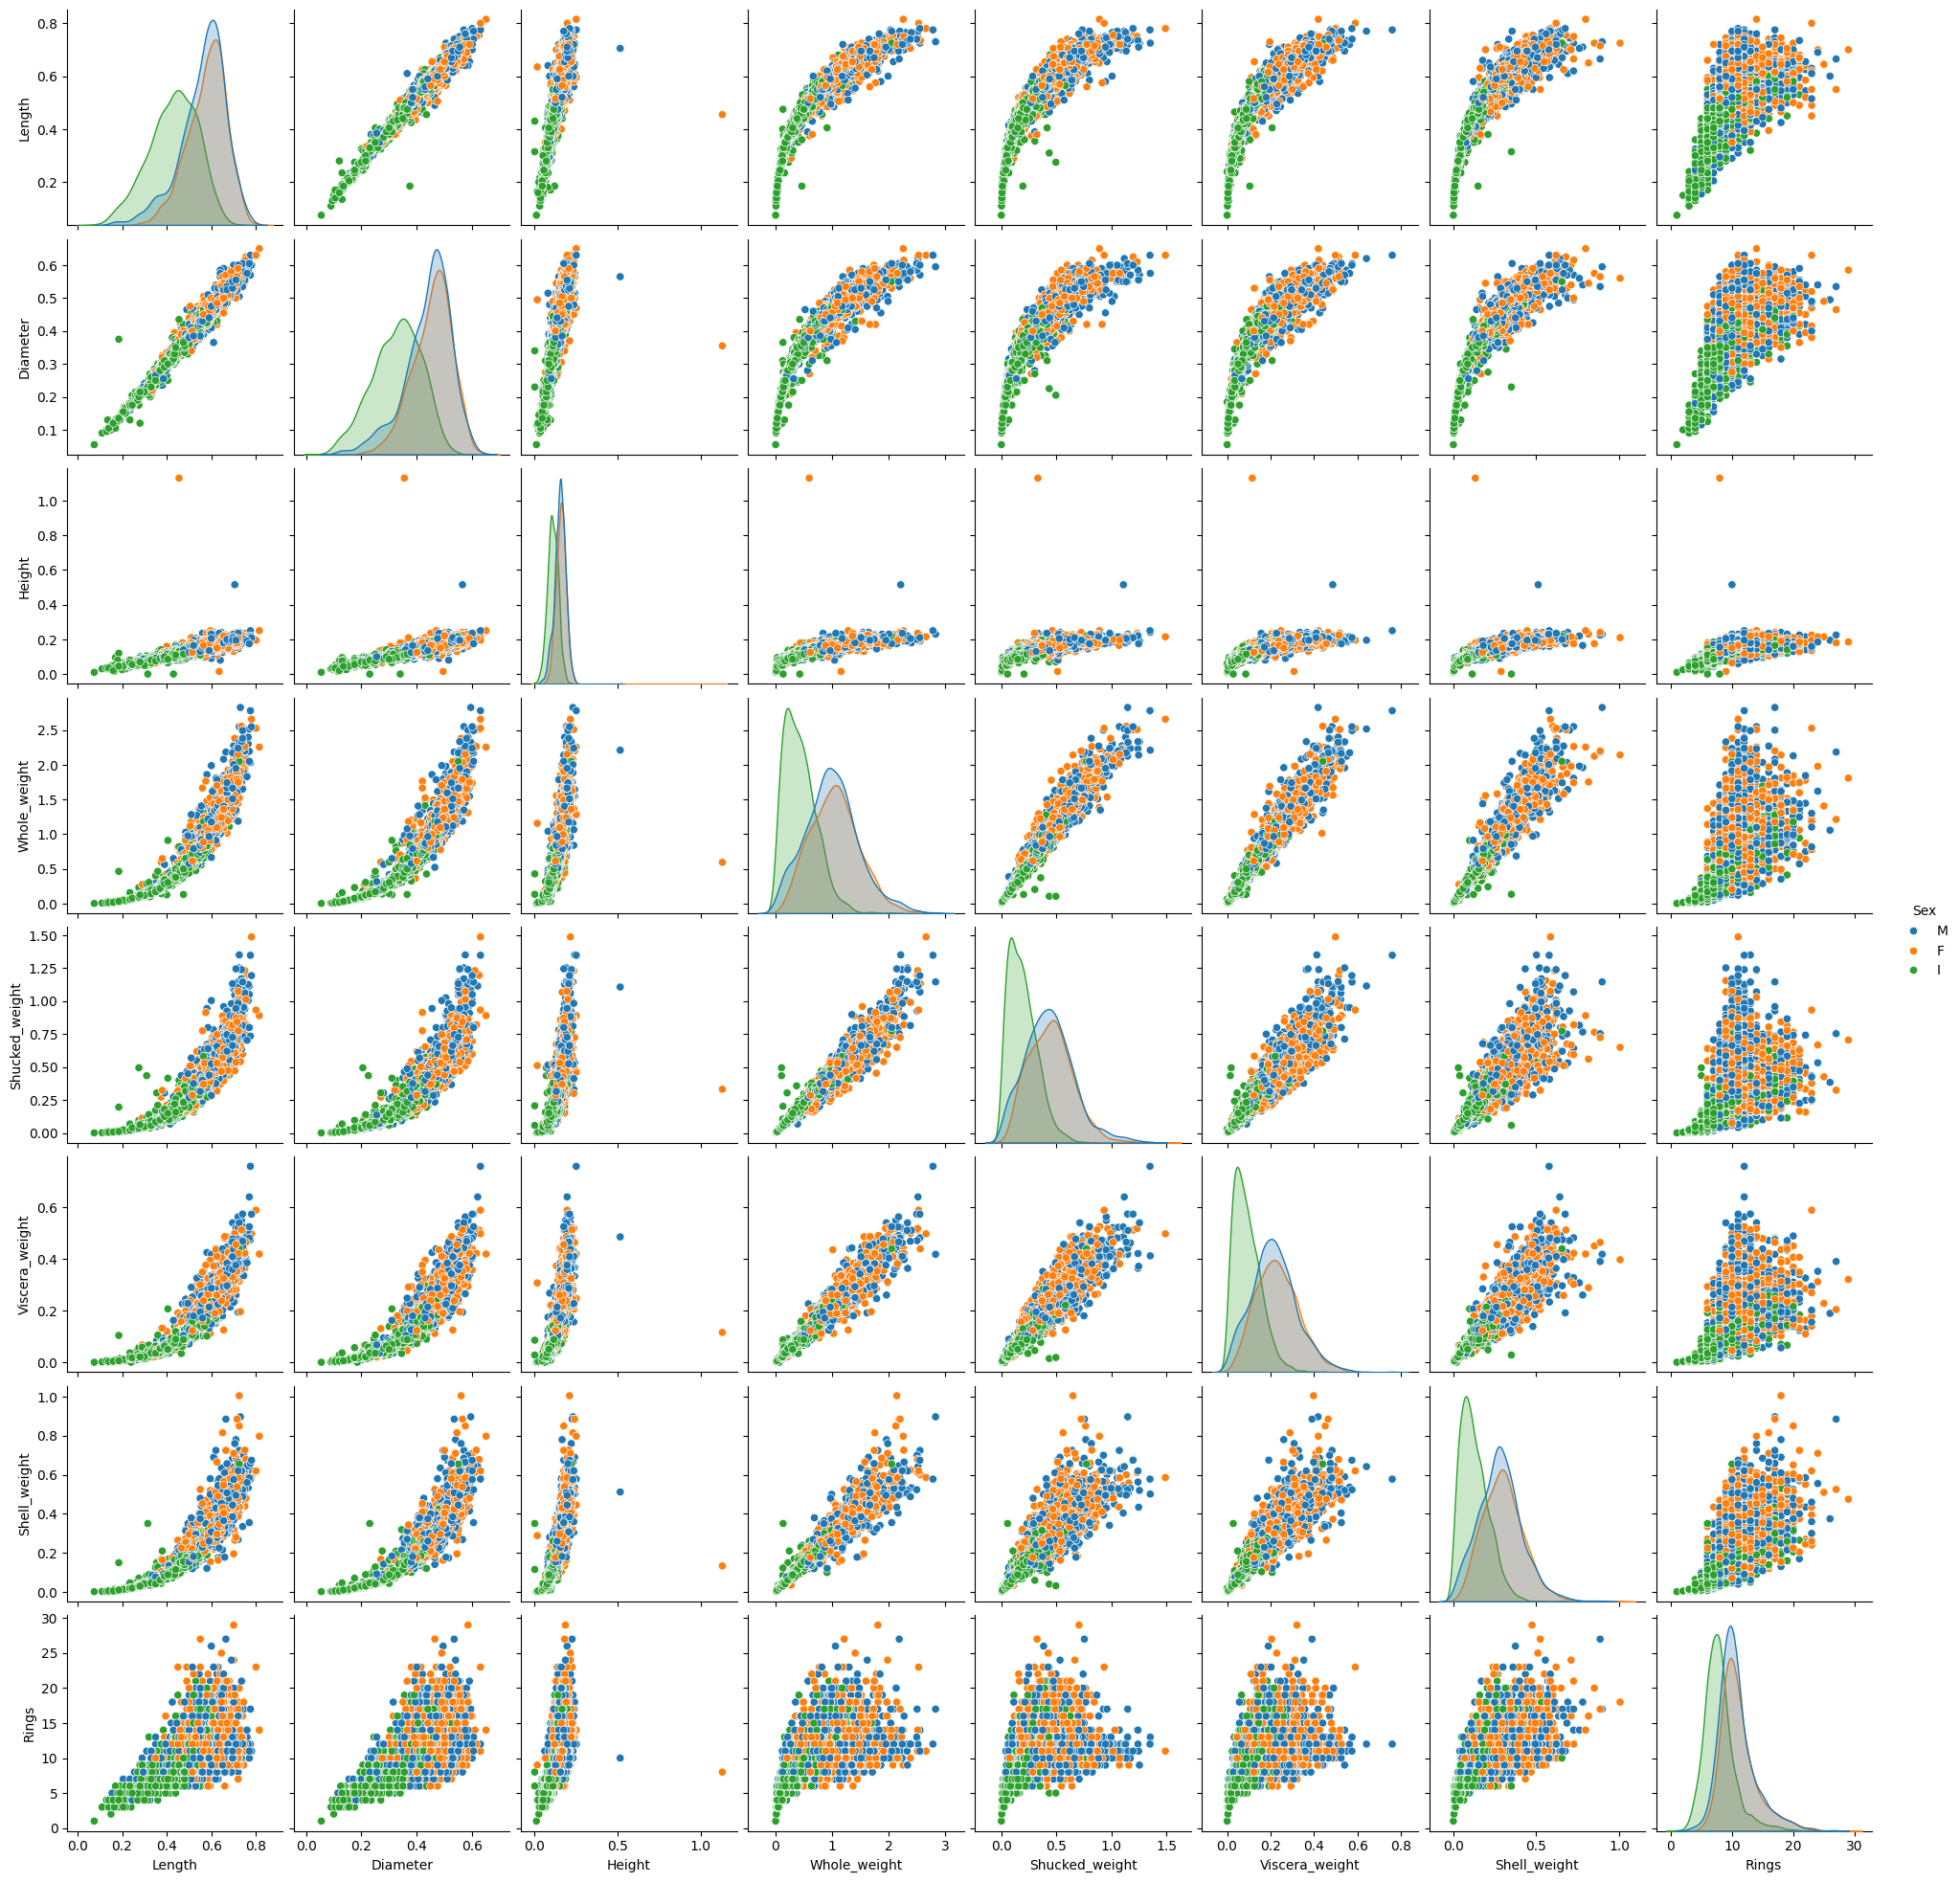

In [8]:
# Crear matriz de gráficos
sns.pairplot(x, hue='Sex')
plt.show()

In [9]:
y.head(4177)

,Rings
0,15
1,7
2,9
3,10
4,7
...,...
4172,11
4173,10
4174,9
4175,10


In [10]:
x.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


### 1.1.3 Tratamiento de los datos

#### 1.1.3.1 Codificar sexo de la especie
Se codifica el sexo del abalon en dos nuevas columnas dado que hay tres sexos, M, F e I. La primera columna codifica uno (1) si es M o F y cero (0) si es I, la segunda columna codifica uno (1) si es M o Cero (0) si es F dado que la primera columna fue 1 y finalmente codifica uno (1) dado que la primera columna es cero (0).

In [55]:
x['sex1'] = x['Sex'].apply(lambda x: 1 if x in ['M', 'F'] else 0)
def encode_sex(row):
    if row['sex1'] == 1:
        return 1 if row['Sex'] == 'M' else 0
    else:
        return 1

x['sex2'] = x.apply(encode_sex, axis=1)
x = x.drop(['Sex'], axis=1)

x.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,sex1,sex2
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,1,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,1,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,1,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1


#### 1.1.3.2 Unificar los conjuntos de datos

In [56]:
x = pd.concat([x,y], axis=1)
x.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,sex1,sex2,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,1,1,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,1,1,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,1,1,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,7


In [13]:
y.head(4177)

,Rings
0,15
1,7
2,9
3,10
4,7
...,...
4172,11
4173,10
4174,9
4175,10


## 1.2 Análisis Exploratorio de los Datos (EDA)

### 1.2.1 Visualización de los datos

Se realiza una visualización inicial de la distribución de los datos para observar su comportamiento, su tendencia, asimetría y curtosis y a partir de ahí plantear o intuir posibles hipótesis ante correlaciones entre las variables observadas. Se realiza un histograma para las variables más reelevantes de las caracaterísticas físicas del Abalon, entre las que se encuentra Logitud, Diametro, Peso completo y ancho, además se realiza un conteo y proporción entre las variables categóricas de sexo.

En cuanto a la distribución de los datos se observa asimetría en las 4 variables siendo altura y peso (3.1288 y 0.5309 respectivamente) variables con asimetría a la izquierda y longitud y diámetro (-0.6398 y -0.6091 respectivamente) variables con asimetría a la derecha. La curtosis para las variables diámetro y peso normal son platicúrticas (-0.0454 y -0236 respectivamente), es decir, tienen un apuntamiento achatado y las variables longitud y altura son leptocúrticas (0.0646 y 76.0255 respectivamente)por lo que tienen un apuntamiento o distribución puntiaguda.

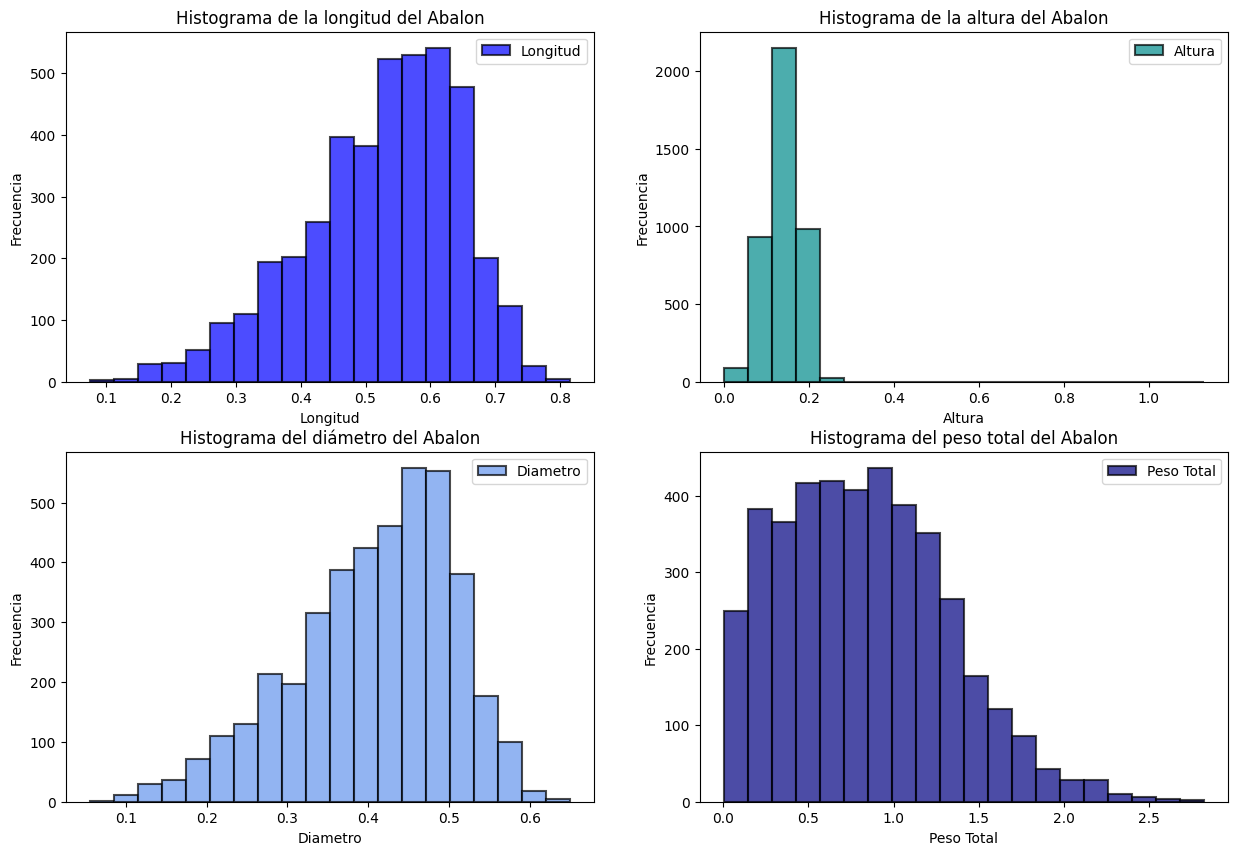

In [14]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

x['Length'].plot(kind='hist', bins=20, title='Histograma de la longitud del Abalon',  ax = axs[0,0],
                 alpha=0.7, color='blue', edgecolor='black', linewidth=1.5, label='Longitud')
axs[0, 0].set_xlabel('Longitud')
axs[0, 0].set_ylabel('Frecuencia')
axs[0, 0].legend()

x['Height'].plot(kind = 'hist', bins = 20, title = 'Histograma de la altura del Abalon', ax =axs[0,1],
                 alpha=0.7, color = 'darkcyan', edgecolor = 'black', linewidth = 1.5, label = 'Altura')
axs[0, 1].set_xlabel('Altura')
axs[0, 1].set_ylabel('Frecuencia')
axs[0, 1].legend()

x['Diameter'].plot(kind = 'hist', bins = 20, title = 'Histograma del diámetro del Abalon', ax = axs[1,0],
                   alpha=0.7, color = 'cornflowerblue', edgecolor = 'black', linewidth = 1.5, label = 'Diametro')
axs[1, 0].set_xlabel('Diametro')
axs[1, 0].set_ylabel('Frecuencia')
axs[1, 0].legend()

x['Whole_weight'].plot(kind = 'hist', bins = 20, title = 'Histograma del peso total del Abalon', ax = axs[1,1],
                       alpha=0.7, color = 'navy', edgecolor = 'black', linewidth = 1.5, label = 'Peso Total')
axs[1, 1].set_xlabel('Peso Total')
axs[1, 1].set_ylabel('Frecuencia')
axs[1, 1].legend()

# plt.gca().spines[['top', 'right',]].set_visible(False)

In [15]:
# Calcular la curtosis y la asimetría para cada variable
curtosis_length = x['Length'].kurtosis()
asimetria_length = x['Length'].skew()

curtosis_height = x['Height'].kurtosis()
asimetria_height = x['Height'].skew()

curtosis_diameter = x['Diameter'].kurtosis()
asimetria_diameter = x['Diameter'].skew()

curtosis_whole_weight = x['Whole_weight'].kurtosis()
asimetria_whole_weight = x['Whole_weight'].skew()

# Imprimir los resultados
print("Curtosis y asimetría de las variables:")
print("Longitud - Curtosis:", curtosis_length, "Asimetría:", asimetria_length)
print("Altura - Curtosis:", curtosis_height, "Asimetría:", asimetria_height)
print("Diámetro - Curtosis:", curtosis_diameter, "Asimetría:", asimetria_diameter)
print("Peso Total - Curtosis:", curtosis_whole_weight, "Asimetría:", asimetria_whole_weight)

Curtosis y asimetría de las variables:
Longitud - Curtosis: 0.06462097389494126 Asimetría: -0.639873268981801
Altura - Curtosis: 76.02550922920125 Asimetría: 3.1288173790659615
Diámetro - Curtosis: -0.04547558144299568 Asimetría: -0.6091981423290918
Peso Total - Curtosis: -0.02364350426998163 Asimetría: 0.5309585632523087


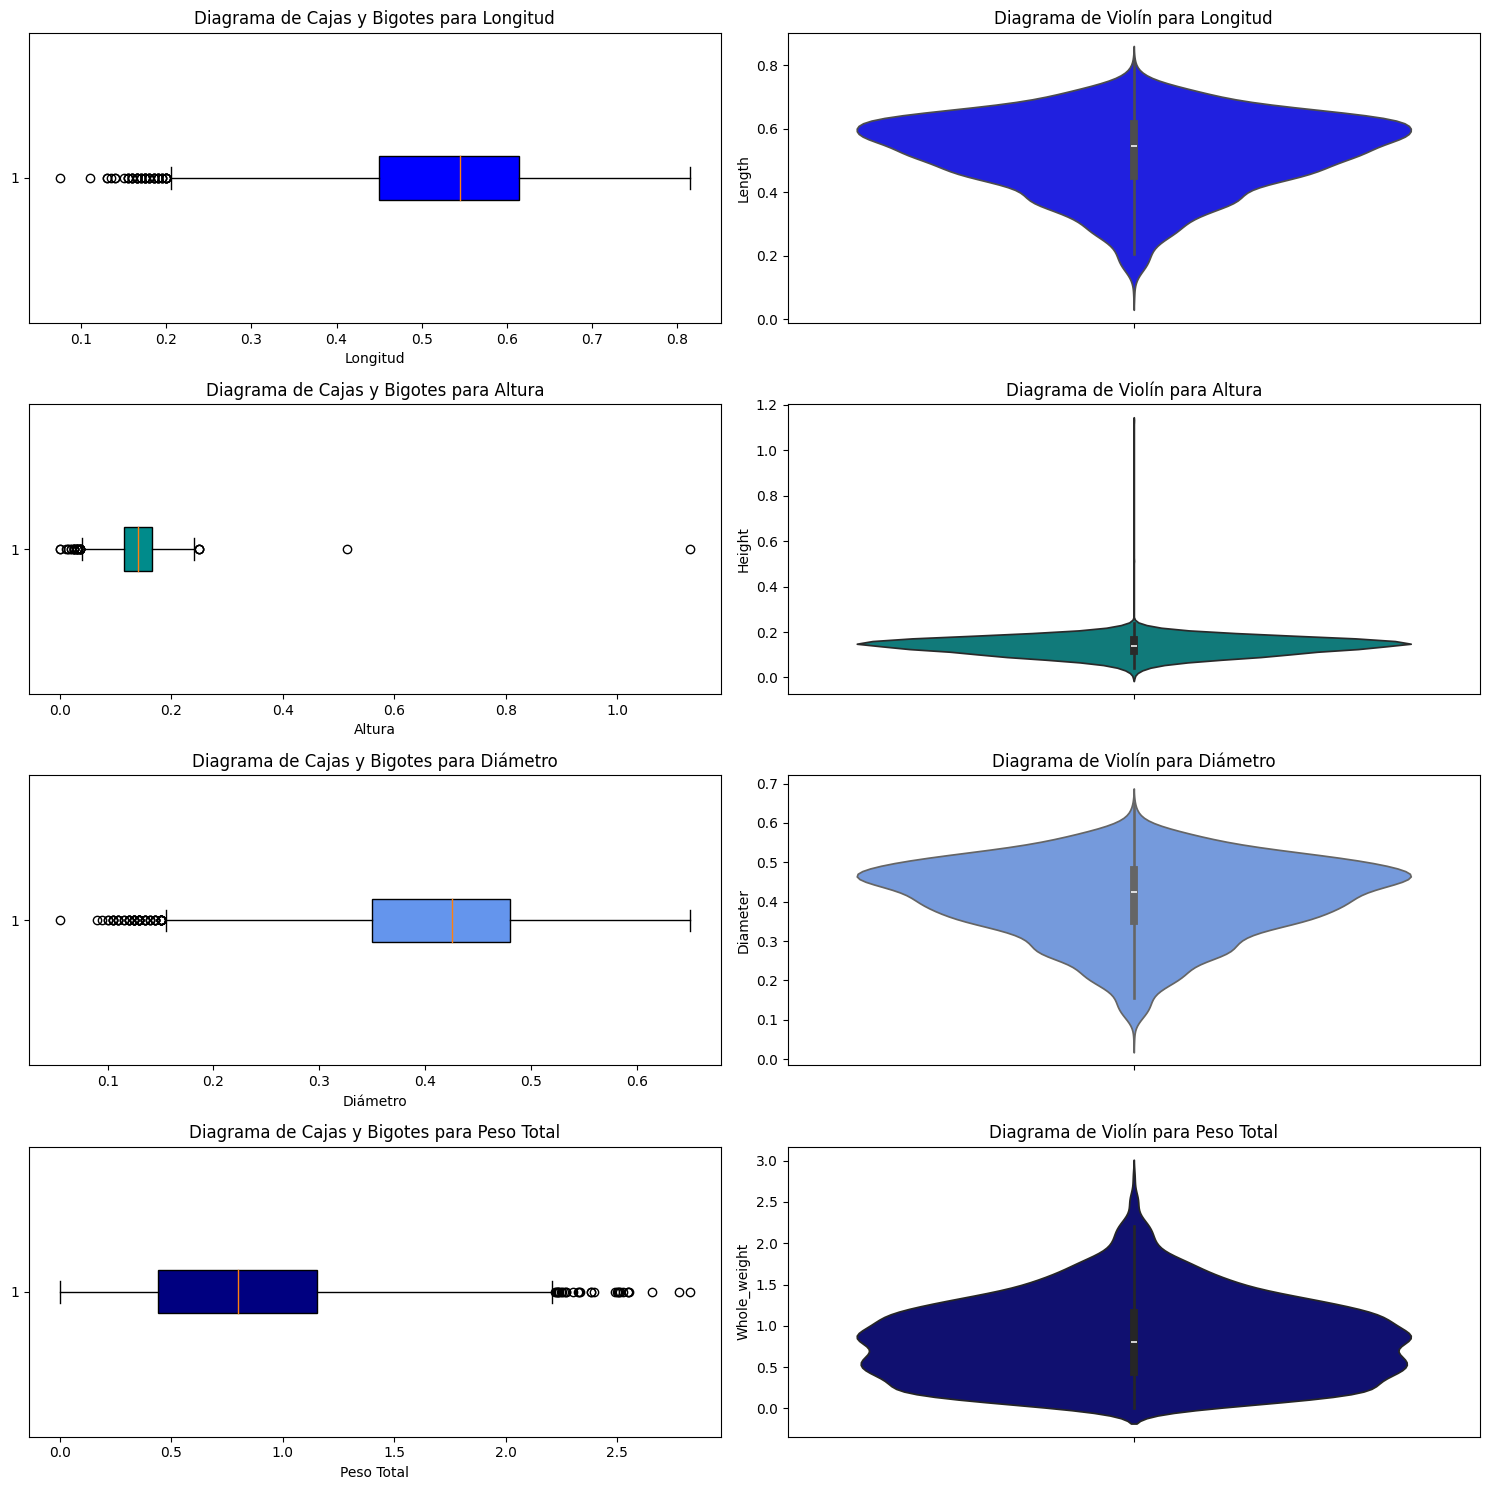

In [16]:
colors = ['blue', 'darkcyan', 'cornflowerblue', 'navy']
fig, axs = plt.subplots(4, 2, figsize=(15, 15))

axs[0, 0].boxplot(x['Length'], vert=False, patch_artist=True, boxprops=dict(facecolor='blue'))
axs[0, 0].set_title('Diagrama de Cajas y Bigotes para Longitud')
axs[0, 0].set_xlabel('Longitud')
sns.violinplot(data=x['Length'], ax=axs[0, 1], color='blue')
axs[0, 1].set_title('Diagrama de Violín para Longitud')

axs[1, 0].boxplot(x['Height'], vert=False, patch_artist=True, boxprops=dict(facecolor='darkcyan'))
axs[1, 0].set_title('Diagrama de Cajas y Bigotes para Altura')
axs[1, 0].set_xlabel('Altura')
sns.violinplot(data=x['Height'], ax=axs[1, 1], color='darkcyan')
axs[1, 1].set_title('Diagrama de Violín para Altura')

# Diagrama de cajas y bigotes horizontal para 'Diameter'
axs[2, 0].boxplot(x['Diameter'], vert=False, patch_artist=True, boxprops=dict(facecolor='cornflowerblue'))
axs[2, 0].set_title('Diagrama de Cajas y Bigotes para Diámetro')
axs[2, 0].set_xlabel('Diámetro')
sns.violinplot(data=x['Diameter'], ax=axs[2, 1], color='cornflowerblue')
axs[2, 1].set_title('Diagrama de Violín para Diámetro')

# Diagrama de cajas y bigotes horizontal para 'Whole_weight'
axs[3, 0].boxplot(x['Whole_weight'], vert=False, patch_artist=True, boxprops=dict(facecolor='navy'))
axs[3, 0].set_title('Diagrama de Cajas y Bigotes para Peso Total')
axs[3, 0].set_xlabel('Peso Total')
sns.violinplot(data=x['Whole_weight'], ax=axs[3, 1], color='navy')
axs[3, 1].set_title('Diagrama de Violín para Peso Total')

# Ajustar el espaciado entre subgráficos
plt.tight_layout()

# Mostrar el gráfico
plt.show()

#### Número de anillos

En el gráfico descriptivo de la distribución de los anillos del Abalón se ratifica una posible distribución normal con una alta dispersión de los datos y varios datos atípicos.

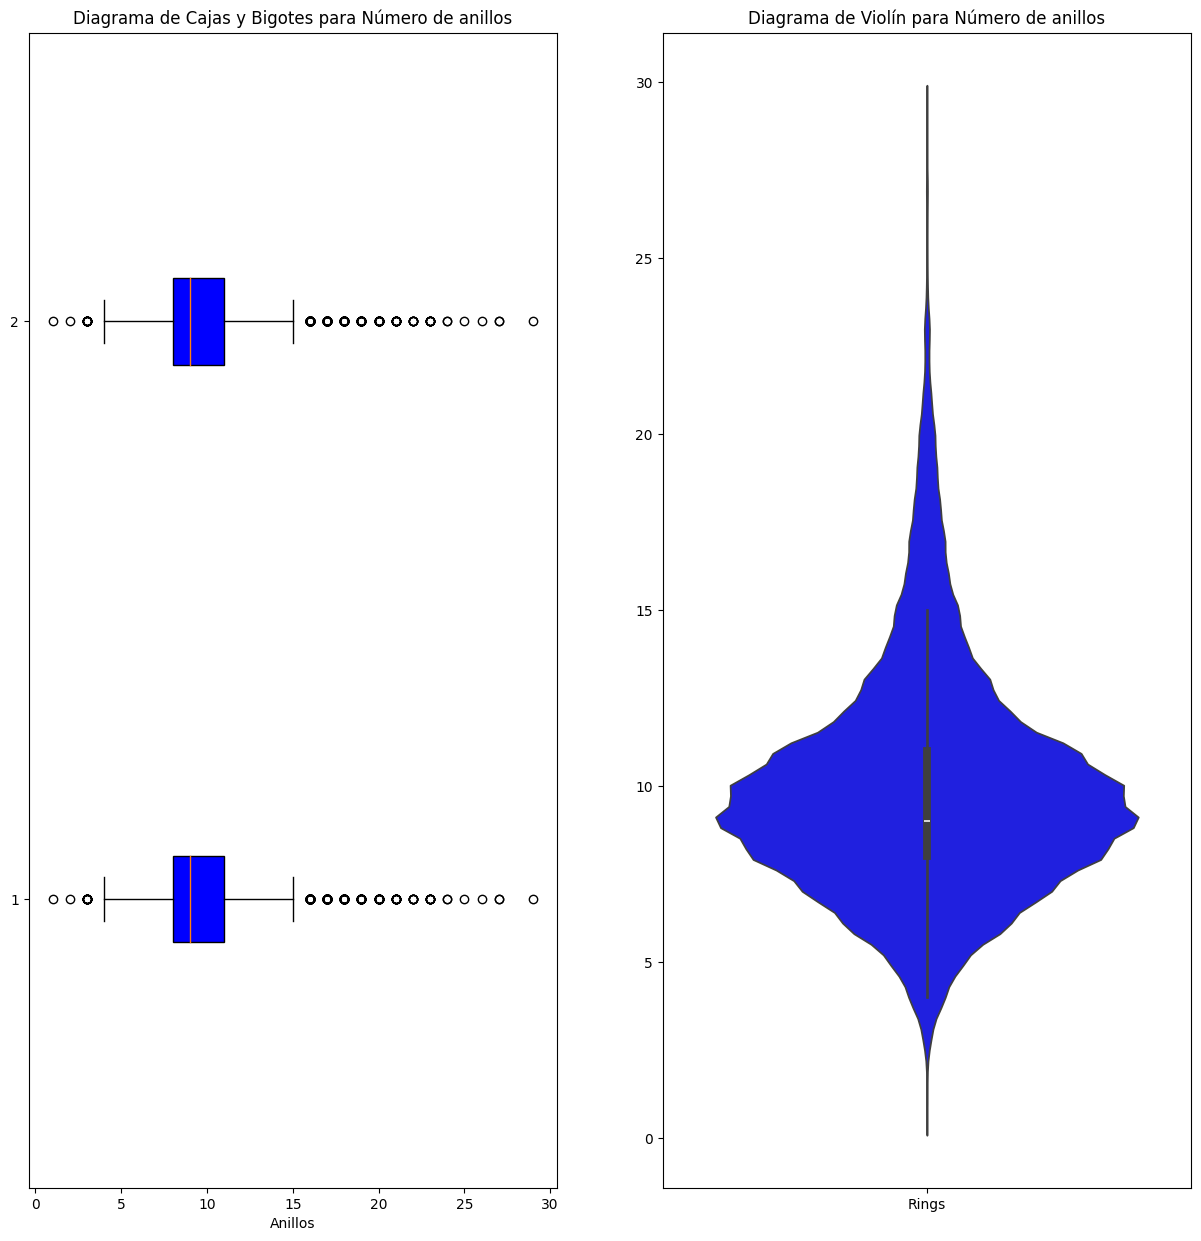

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(15, 15))
ax[0].boxplot(x['Rings'], vert=False, patch_artist=True, boxprops=dict(facecolor='blue'))
ax[0].set_title('Diagrama de Cajas y Bigotes para Número de anillos')
ax[0].set_xlabel('Anillos')
sns.violinplot(data=x['Rings'], ax=ax[1], color='blue')
ax[1].set_title('Diagrama de Violín para Número de anillos')
plt.show()

Examinando la variable de sexo de los Abalón para determinar la proporción de cada uno de ellos, se evidencia una proporcion balanceada entre los 3 tipos de sexo, es decir aproximadamente un tercio (1/3) para cada uno, sin embargo, se consideran desbalanceados, ya que la suma de los sexos definidos como masculino y femenino es superior al 60% de los datos en contraste con los infantes, grupo dentro del cual no se puede realizar inferencias estadísticas para el número de anillos.

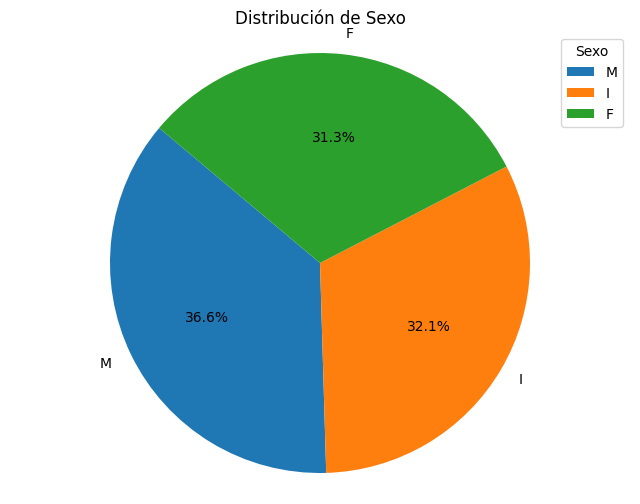

In [18]:
sex_counts = x1['Sex'].value_counts()

# Crear el diagrama de pastel
plt.figure(figsize=(8, 6))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=140)

# Agregar título y leyenda
plt.title('Distribución de Sexo')
plt.legend(title='Sexo', loc='upper right')

# Mostrar el gráfico
plt.axis('equal')  # Para asegurar que el gráfico sea un círculo
plt.show()

### 1.2.2 Pruebas de normalidad

Se desea indagar acerca de la normalidad en cuanto a la distribución de los datos, por lo que se realiza un test de normalidad de kolmogrov-smirnov (n > 50) con un alfa = 0.05.

- **h0:** No hay diferencia estadísticamente significativa entre la distribución de la población a que pertenece la muestra y la distribución Normal.
- **h1:** Hay diferencia estadísticamente significativa entre la distribución de la población a que pertenece la muestra y la distribución Normal.

Si el p-valor del test de normalidad para las variables es menor que cualquier alfa ( en este caso 0.05) se dice que la variable sigue una distribución normal, caso contrario, se dice que la variable no se ajusta a una distribución normal.

In [19]:
# Realizar la prueba de normalidad para cada variable
p_value_length = round(kstest(x['Length'], 'norm').pvalue, 10)
p_value_height = round(kstest(x['Height'], 'norm').pvalue, 10)
p_value_diameter = round(kstest(x['Diameter'], 'norm').pvalue, 10)
p_value_whole_weight = round(kstest(x['Whole_weight'], 'norm').pvalue, 10)
p_value_shell_weight = round(kstest(x['Shell_weight'], 'norm').pvalue, 10)
p_value_viscera_weight = round(kstest(x['Viscera_weight'], 'norm').pvalue, 10)
p_value_shucked_weight = round(kstest(x['Shucked_weight'], 'norm').pvalue, 10)
# p_value_rings = round(kstest(x['Rings'], 'norm').pvalue, 10)


# Imprimir los resultados
print("Resultados del test de normalidad de Kolmogorov-Smirnov:")
print("Longitud - Valor p:", p_value_length)
print("Altura - Valor p:", p_value_height)
print("Diámetro - Valor p:", p_value_diameter)
print("Peso Total - Valor p:", p_value_whole_weight)
print("Peso de concha - Vlor P:", p_value_shucked_weight)
print("Peso de viscera - Valor p:", p_value_viscera_weight)
print("Peso de shell - Valor p:", p_value_shell_weight)
# print("Número de anillos - Valor p:", p_value_rings)

Resultados del test de normalidad de Kolmogorov-Smirnov:
Longitud - Valor p: 0.0
Altura - Valor p: 0.0
Diámetro - Valor p: 0.0
Peso Total - Valor p: 0.0
Peso de concha - Vlor P: 0.0
Peso de viscera - Valor p: 0.0
Peso de shell - Valor p: 0.0


### 1.2.3 Análisis bivariado

Se realiza una matriz de correlación para inspección la dependcia lineal entre los datos implementando el método de pearson dado que alfa < 0.05. Se evidencia una alta correlación entre las variables peso vs diámetro...

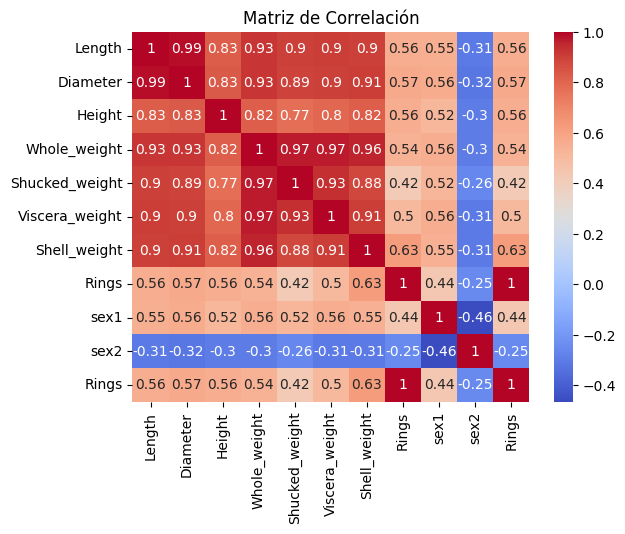

In [20]:
correlation_matrix = x.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

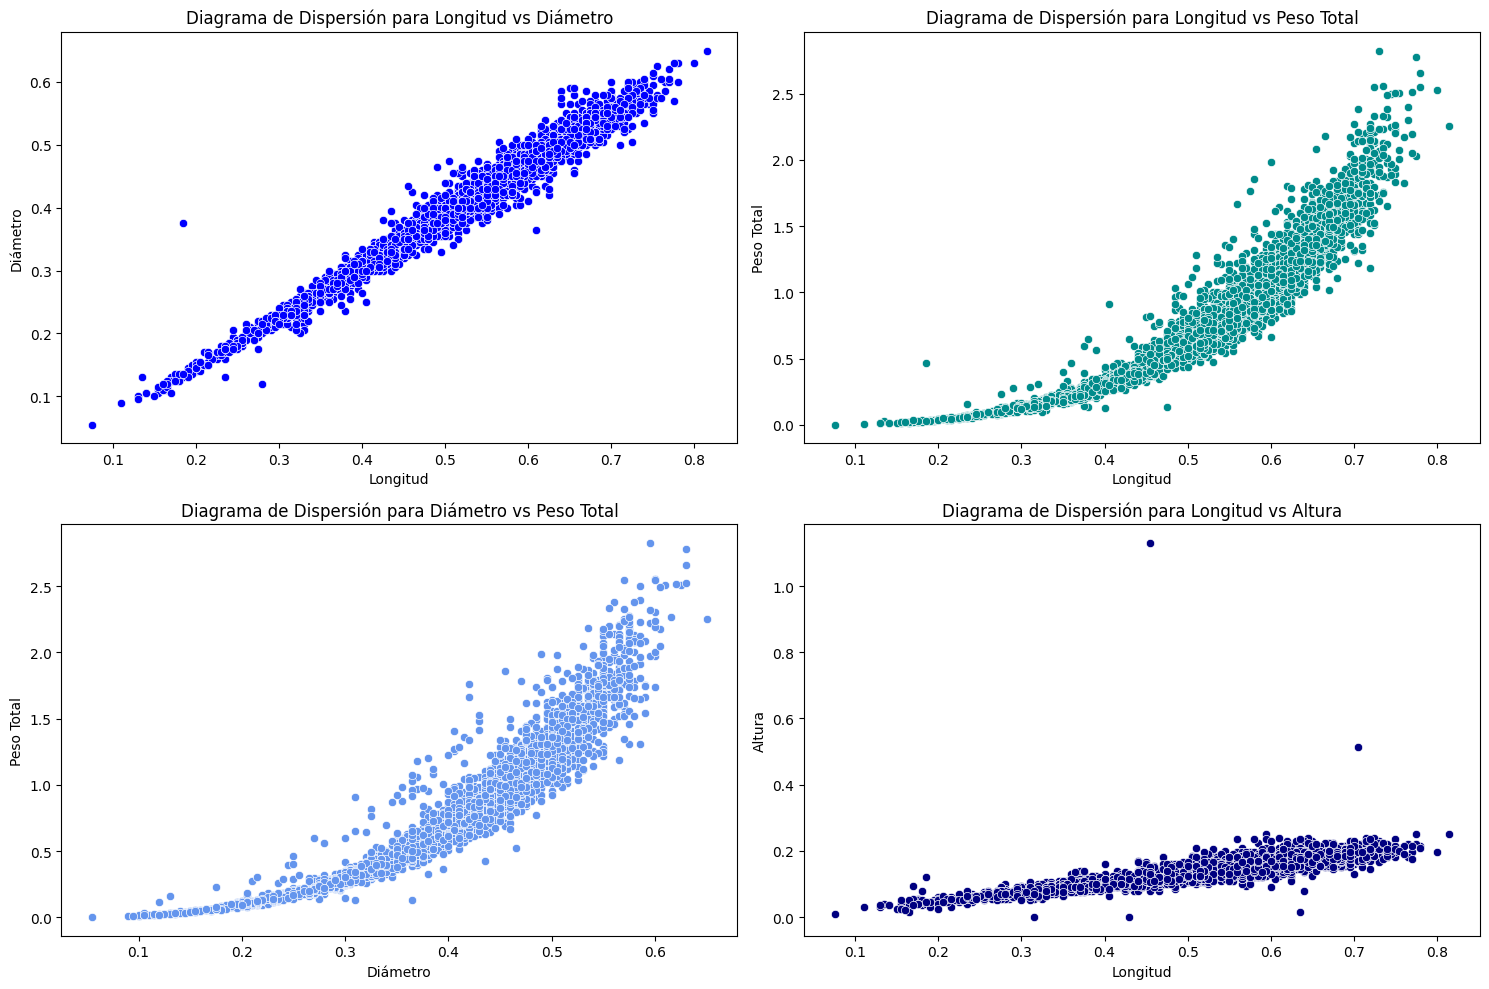

In [21]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

sns.scatterplot(x=x['Length'], y=x['Diameter'], ax=axs[0, 0], color='blue')
axs[0, 0].set_title('Diagrama de Dispersión para Longitud vs Diámetro')
axs[0, 0].set_xlabel('Longitud')
axs[0, 0].set_ylabel('Diámetro')

sns.scatterplot(x=x['Length'], y=x['Whole_weight'], ax=axs[0, 1], color='darkcyan')
axs[0, 1].set_title('Diagrama de Dispersión para Longitud vs Peso Total')
axs[0, 1].set_xlabel('Longitud')
axs[0, 1].set_ylabel('Peso Total')

sns.scatterplot(x=x['Diameter'], y=x['Whole_weight'], ax=axs[1, 0], color='cornflowerblue')
axs[1, 0].set_title('Diagrama de Dispersión para Diámetro vs Peso Total')
axs[1, 0].set_xlabel('Diámetro')
axs[1, 0].set_ylabel('Peso Total')

sns.scatterplot(x=x['Length'], y=x['Height'], ax=axs[1, 1], color='navy')
axs[1, 1].set_title('Diagrama de Dispersión para Longitud vs Altura')
axs[1, 1] .set_xlabel('Longitud')
axs[1, 1].set_ylabel('Altura')

plt.tight_layout()
plt.show()

### 1.2.4 Formulación de hipótesis y clusterización

#### 1.2.4.1 Desarrollo de hipótesis de correlación
Se desarrolla una prueba de hipótesis para la correlación entre las variables Rings vs Length, Rings vs Diameter, Rings vs Whole_weigth y Rings vs Sucked_Weigth con el método de Pearson dado que los datos se ajustan a una distribución normal, Con el fin de determinar cual variable establece una correlación más fuerte con la variable predictora o explican mejor la variable predictiva o número de anillos

Coeficiente de correlación de Pearson: 0.5567195769296179
P-valor: 0.0
Existe evidencia suficiente para rechazar la hipótesis nula.


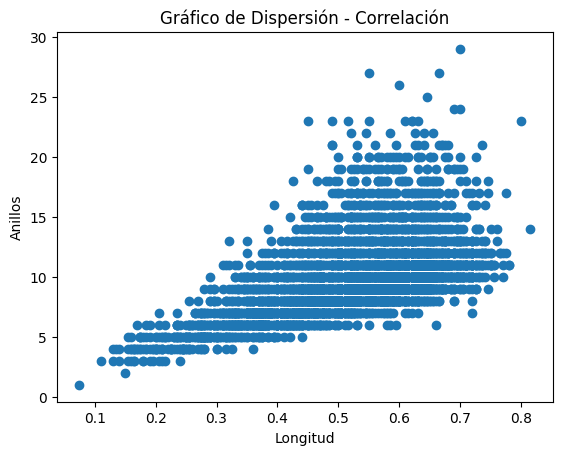

In [22]:
# Calcula el coeficiente de correlación de Pearson y el p-valor
corr_coef, p_value = pearsonr(x1['Length'], x1['Rings'])

# Imprime el coeficiente de correlación y el p-valor
print("Coeficiente de correlación de Pearson:", corr_coef)
print("P-valor:", p_value)

# Realiza la prueba de significancia
alpha = 0.05  # Nivel de significancia
if p_value < alpha:
    print("Existe evidencia suficiente para rechazar la hipótesis nula.")
else:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")

# Muestra un gráfico de dispersión para visualizar la correlación
plt.scatter(x1['Length'], x1['Rings'])
plt.xlabel('Longitud')
plt.ylabel('Anillos')
plt.title('Gráfico de Dispersión - Correlación')
plt.show()

Coeficiente de correlación de Pearson: 0.5746598513059195
P-valor: 0.0
Existe evidencia suficiente para rechazar la hipótesis nula.


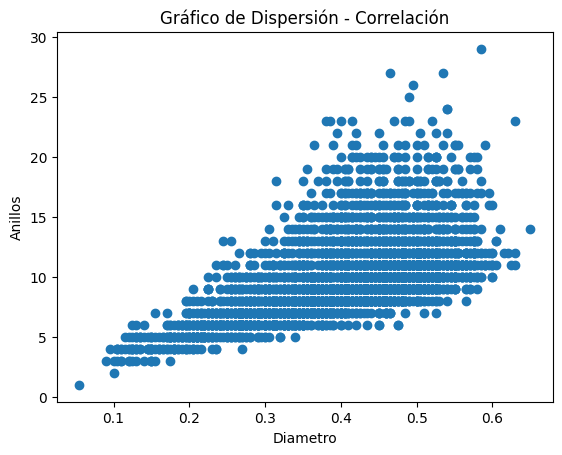

In [23]:
# Calcula el coeficiente de correlación de Pearson y el p-valor
corr_coef, p_value = pearsonr(x1['Diameter'], x1['Rings'])

# Imprime el coeficiente de correlación y el p-valor
print("Coeficiente de correlación de Pearson:", corr_coef)
print("P-valor:", p_value)

# Realiza la prueba de significancia
alpha = 0.05  # Nivel de significancia
if p_value < alpha:
    print("Existe evidencia suficiente para rechazar la hipótesis nula.")
else:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")

# Muestra un gráfico de dispersión para visualizar la correlación
plt.scatter(x1['Diameter'], x1['Rings'])
plt.xlabel('Diametro')
plt.ylabel('Anillos')
plt.title('Gráfico de Dispersión - Correlación')
plt.show()

Coeficiente de correlación de Pearson: 0.5403896769239009
P-valor: 1.88867822e-315
Existe evidencia suficiente para rechazar la hipótesis nula.


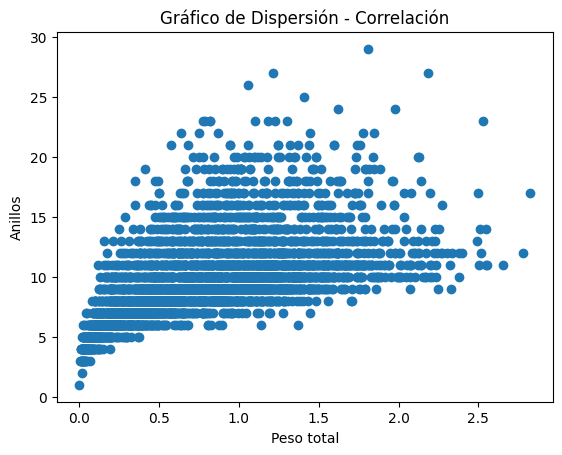

In [24]:
# Calcula el coeficiente de correlación de Pearson y el p-valor
corr_coef, p_value = pearsonr(x1['Whole_weight'], x1['Rings'])

# Imprime el coeficiente de correlación y el p-valor
print("Coeficiente de correlación de Pearson:", corr_coef)
print("P-valor:", p_value)

# Realiza la prueba de significancia
alpha = 0.05  # Nivel de significancia
if p_value < alpha:
    print("Existe evidencia suficiente para rechazar la hipótesis nula.")
else:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")

# Muestra un gráfico de dispersión para visualizar la correlación
plt.scatter(x1['Whole_weight'], x1['Rings'])
plt.xlabel('Peso total')
plt.ylabel('Anillos')
plt.title('Gráfico de Dispersión - Correlación')
plt.show()

Coeficiente de correlación de Pearson: 0.42088365794521454
P-valor: 5.0874642161778864e-179
Existe evidencia suficiente para rechazar la hipótesis nula.


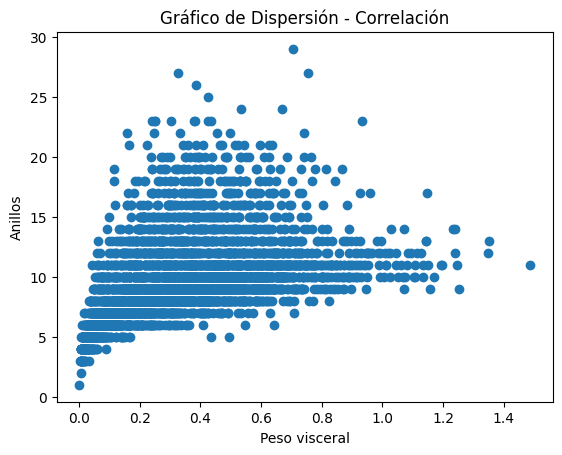

In [25]:
# Calcula el coeficiente de correlación de Pearson y el p-valor
corr_coef, p_value = pearsonr(x1['Shucked_weight'], x1['Rings'])

# Imprime el coeficiente de correlación y el p-valor
print("Coeficiente de correlación de Pearson:", corr_coef)
print("P-valor:", p_value)

# Realiza la prueba de significancia
alpha = 0.05  # Nivel de significancia
if p_value < alpha:
    print("Existe evidencia suficiente para rechazar la hipótesis nula.")
else:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")

# Muestra un gráfico de dispersión para visualizar la correlación
plt.scatter(x1['Shucked_weight'], x1['Rings'])
plt.xlabel('Peso visceral')
plt.ylabel('Anillos')
plt.title('Gráfico de Dispersión - Correlación')
plt.show()

Se establece que, al no evidenciar una correlación significativa o fuerte (superior al 80%), se debe evaluar los datos bajo otro modelo que no sea lineal, ya que los datos no evidencian una correlación de tipo lineal al ser heterocedasticos y altamente dispersos.

In [26]:
muestra1 = x1['Length']
muestra2 = x1['Rings']

# Realiza la prueba de Levene para comparar las varianzas
statistic, p_value = levene(muestra1, muestra2)

# Imprime el estadístico de la prueba y el p-valor
print("Estadístico de la prueba de Levene:", statistic)
print("P-valor:", p_value)

# Define el nivel de significancia
alpha = 0.05

# Compara el p-valor con el nivel de significancia
if p_value < alpha:
    print("Se rechaza la hipótesis nula. Las varianzas de la longitud y los anillos son diferentes (heterocedasticidad).")
else:
    print("No se puede rechazar la hipótesis nula. Las varianzas son iguales (homocedasticidad).")

Estadístico de la prueba de Levene: 3750.203979379155
P-valor: 0.0
Se rechaza la hipótesis nula. Las varianzas de la longitud y los anillos son diferentes (heterocedasticidad).


In [27]:
muestra1 = x1['Diameter']
muestra2 = x1['Rings']

# Realiza la prueba de Levene para comparar las varianzas
statistic, p_value = levene(muestra1, muestra2)

# Imprime el estadístico de la prueba y el p-valor
print("Estadístico de la prueba de Levene:", statistic)
print("P-valor:", p_value)

# Define el nivel de significancia
alpha = 0.05

# Compara el p-valor con el nivel de significancia
if p_value < alpha:
    print("Se rechaza la hipótesis nula. Las varianzas del diametro y los anillos son diferentes (heterocedasticidad).")
else:
    print("No se puede rechazar la hipótesis nula. Las varianzas son iguales (homocedasticidad).")

Estadístico de la prueba de Levene: 3805.5419405374623
P-valor: 0.0
Se rechaza la hipótesis nula. Las varianzas del diametro y los anillos son diferentes (heterocedasticidad).


In [28]:
muestra1 = x1['Whole_weight']
muestra2 = x1['Rings']

# Realiza la prueba de Levene para comparar las varianzas
statistic, p_value = levene(muestra1, muestra2)

# Imprime el estadístico de la prueba y el p-valor
print("Estadístico de la prueba de Levene:", statistic)
print("P-valor:", p_value)

# Define el nivel de significancia
alpha = 0.05

# Compara el p-valor con el nivel de significancia
if p_value < alpha:
    print("Se rechaza la hipótesis nula. Las varianzas del peso total y los anillos son diferentes (heterocedasticidad).")
else:
    print("No se puede rechazar la hipótesis nula. Las varianzas son iguales (homocedasticidad).")

Estadístico de la prueba de Levene: 2773.3044849940134
P-valor: 0.0
Se rechaza la hipótesis nula. Las varianzas del peso total y los anillos son diferentes (heterocedasticidad).


In [29]:
muestra1 = x1['Shucked_weight']
muestra2 = x1['Rings']

# Realiza la prueba de Levene para comparar las varianzas
statistic, p_value = levene(muestra1, muestra2)

# Imprime el estadístico de la prueba y el p-valor
print("Estadístico de la prueba de Levene:", statistic)
print("P-valor:", p_value)

# Define el nivel de significancia
alpha = 0.05

# Compara el p-valor con el nivel de significancia
if p_value < alpha:
    print("Se rechaza la hipótesis nula. Las varianzas del peso de las visceras y los anillos son diferentes (heterocedasticidad).")
else:
    print("No se puede rechazar la hipótesis nula. Las varianzas son iguales (homocedasticidad).")

Estadístico de la prueba de Levene: 3473.1362646148496
P-valor: 0.0
Se rechaza la hipótesis nula. Las varianzas del peso de las visceras y los anillos son diferentes (heterocedasticidad).


#### 1.2.4.2 Cluster 2D

Descripción de la organizacion de cluster 2d

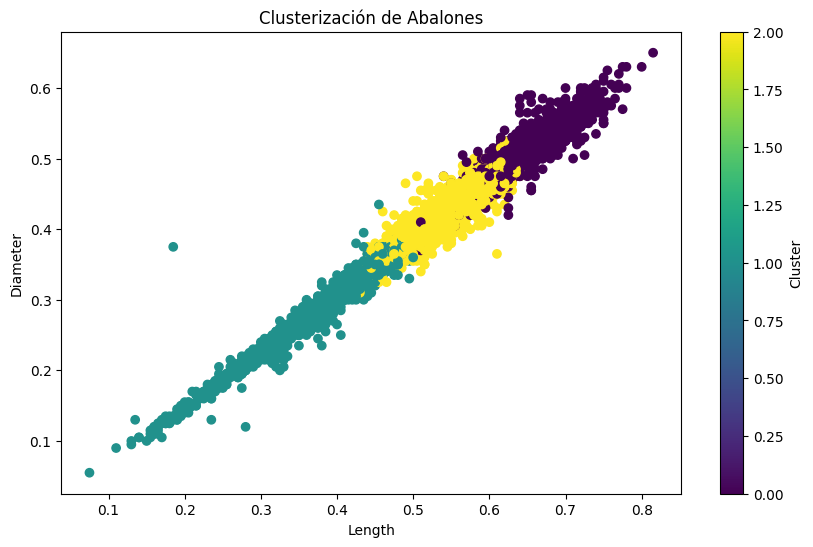

In [30]:
# Convertir la variable categórica 'Sex' en una representación numérica (si es necesario)
x1['Sex'] = x1['Sex'].map({'M': 0, 'F': 1, 'I': 2})

# Estandarizar los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(x1.drop('Sex', axis=1))  # No escalamos la variable 'Sex'

# Aplicar el algoritmo K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Agregar los resultados de la clusterización al DataFrame original
x1['Cluster'] = clusters
x['Cluster'] = clusters

# Mostrar los resultados gráficamente
plt.figure(figsize=(10, 6))
plt.scatter(x1['Length'], x1['Diameter'], c=x1['Cluster'], cmap='viridis')
plt.xlabel('Length')
plt.ylabel('Diameter')
plt.title('Clusterización de Abalones')
plt.colorbar(label='Cluster')
plt.show()

#### 1.2.4.3 Cluster 3D

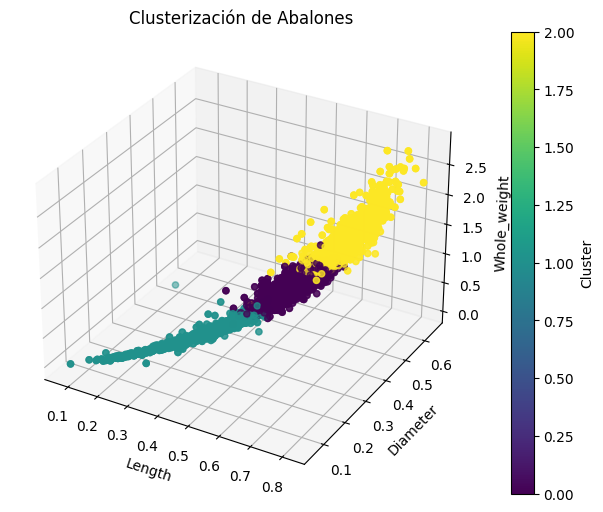

In [31]:
# Convertir la variable categórica 'Sex' en una representación numérica
x1['Sex'] = x1['Sex'].map({'M': 0, 'F': 1, 'I': 2})

# Estandarizar los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(x1.drop('Sex', axis=1))  # No escalamos la variable 'Sex'

# Aplicar el algoritmo K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Agregar los resultados de la clusterización al DataFrame original
x1['Cluster'] = clusters
x['Cluster'] = clusters


# Mostrar los resultados gráficamente en 3D
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Graficar los puntos en el espacio tridimensional
ax.scatter(x1['Length'], x1['Diameter'], x1['Whole_weight'], c=x1['Cluster'], cmap='viridis')

# Etiquetas de los ejes
ax.set_xlabel('Length')
ax.set_ylabel('Diameter')
ax.set_zlabel('Whole_weight')

# Título del gráfico
plt.title('Clusterización de Abalones')

# Mostrar el colorbar
plt.colorbar(ax.scatter(x1['Length'], x1['Diameter'], x1['Whole_weight'], c=x1['Cluster'], cmap='viridis'), label='Cluster')

# Mostrar la gráfica 3D
plt.show()

In [32]:
# Convertir la variable categórica 'Sex' en una representación numérica
x1['Sex'] = x1['Sex'].map({'M': 0, 'F': 1, 'I': 2})

# Estandarizar los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(x1.drop('Sex', axis=1))  # No escalamos la variable 'Sex'

# Aplicar el algoritmo K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Agregar los resultados de la clusterización al DataFrame original
x['Cluster'] = clusters
x1['Cluster'] = clusters


# Crear un gráfico 3D interactivo con Plotly
fig = go.Figure(data=[go.Scatter3d(
    x=x1['Length'],
    y=x1['Diameter'],
    z=x1['Whole_weight'],
    mode='markers',
    marker=dict(
        size=5,
        color=x1['Cluster'],
        colorscale='Viridis',  # Paleta de colores
        opacity=0.8
    )
)])

# Configurar etiquetas y título
fig.update_layout(
    scene=dict(
        xaxis=dict(title='Length'),
        yaxis=dict(title='Diameter'),
        zaxis=dict(title='Whole_weight')
    ),
    title='Clusterización de Abalones'
)

# Mostrar el gráfico interactivo
fig.show()

# 2. Estimadores Bayesianos Ingenuos

Evaluando las características de los datos, se definió como normal el comportamiento de los mismo yas que al aplicar la prueba de hipótesis k-s se concluyó con una confianza del 95% que los datos son normales, ya que el p-valor es menor a cualquier alfa, por tanto, en el estimador bayesiano se hará uso del método gaussiano.

Evaluando el estimador gaussiano se estima con una precisión aproximada del 23% que la variable objetivo, 'Número de anillos' es explicada por las variables categóricas de sexo.

In [33]:
# Separar características y variable objetivo

X = x.drop(['sex1', 'sex2'], axis=1)  # Características
y = y['Rings']  # Variable objetivo (puedes elegir 'sex1' o 'sex2')

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar y entrenar el clasificador Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la precisión del clasificador
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del clasificador Naive Bayes:", accuracy)

Precisión del clasificador Naive Bayes: 1.0


# 3. Árboles de desición
## 3.1 Entropía, Impureza, Random Forest, Tree Bagging

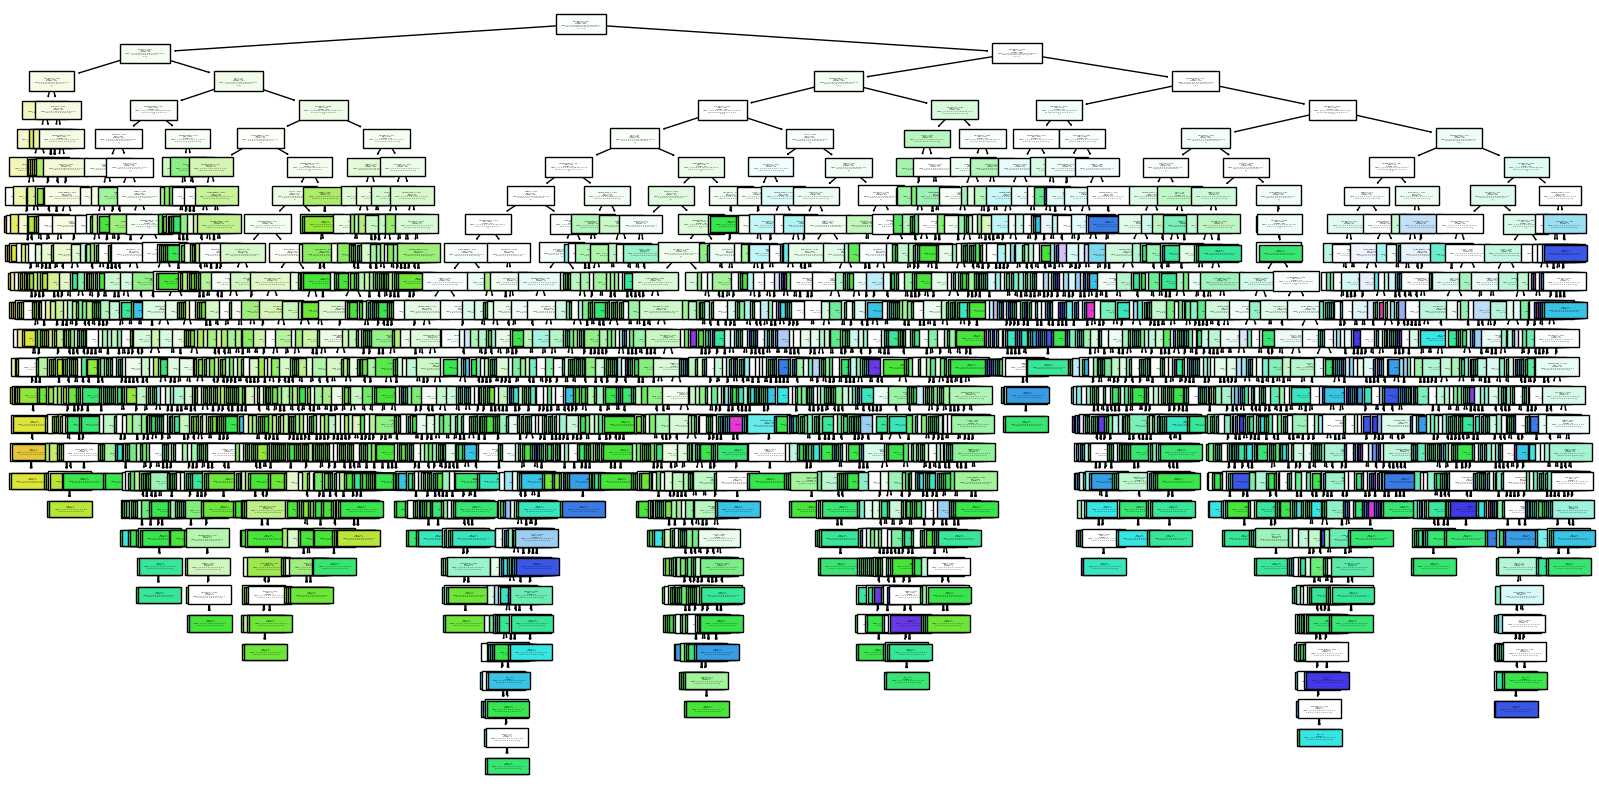

In [34]:
# Fetch dataset
abalone = fetch_ucirepo(id=1)

# data (as pandas dataframes)
x = abalone.data.features
y = abalone.data.targets

x = pd.concat([x, y], axis=1)

# Dividir los datos en características (X) y variable objetivo (y)
y = x['Rings']  # Variable objetivo
X = x.drop('Rings', axis=1)  # Resto de características

# Identificar las columnas categóricas
categorical_columns = X.select_dtypes(include=['object']).columns

# Aplicar One-Hot Encoding a las columnas categóricas
encoder = OneHotEncoder()
X_encoded = pd.DataFrame(encoder.fit_transform(X[categorical_columns]).toarray(), columns=encoder.get_feature_names_out(categorical_columns))
X_encoded = pd.concat([X.drop(columns=categorical_columns), X_encoded], axis=1)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Inicializar y entrenar el modelo de árbol de decisión
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Graficar el árbol de decisión
plt.figure(figsize=(20,10))  # Ajusta el tamaño de la figura según sea necesario
plot_tree(model, feature_names=X_encoded.columns, filled=True, fontsize=1)
plt.show()

In [35]:
# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo de árbol de decisión:", accuracy)

Precisión del modelo de árbol de decisión: 0.215311004784689


In [36]:
def entropy(y):
    """
    Calcula la entropía de un conjunto de datos.

    Parameters:
    y (array-like): Variable objetivo del conjunto de datos.

    Returns:
    float: Entropía del conjunto de datos.
    """
    _, counts = np.unique(y, return_counts=True)
    probabilities = counts / len(y)
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy

def gini_impurity(y):
    """
    Calcula la impureza de Gini de un conjunto de datos.

    Parameters:
    y (array-like): Variable objetivo del conjunto de datos.

    Returns:
    float: Impureza de Gini del conjunto de datos.
    """
    _, counts = np.unique(y, return_counts=True)
    probabilities = counts / len(y)
    gini = 1 - np.sum(probabilities ** 2)
    return gini

# Ejemplo de uso:
# Calcula la entropía del conjunto de datos de entrenamiento
entropia_train = entropy(y_train)
print("Entropía del conjunto de datos de entrenamiento:", entropia_train)

# Calcula la impureza de Gini del conjunto de datos de entrenamiento
impureza_gini_train = gini_impurity(y_train)
print("Impureza de Gini del conjunto de datos de entrenamiento:", impureza_gini_train)

Entropía del conjunto de datos de entrenamiento: 3.596622955862328
Impureza de Gini del conjunto de datos de entrenamiento: 0.8953863462136458


In [37]:
# Inicializar y entrenar el modelo de Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_rf = rf_model.predict(X_test)

# Calcular la precisión del modelo
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Precisión del modelo de Random Forest:", accuracy_rf)

Precisión del modelo de Random Forest: 0.24641148325358853


# 4. Clasificadores vecino más cercano (KNN & RNN)

## 4.1 Clasificación KNN

Se hace una explicación breve sobre en que consisye el metodo y ademas

In [59]:
# fetch dataset
abalone = fetch_ucirepo(id=1)

# data (as pandas dataframes)
x = abalone.data.features
y = abalone.data.targets

x = pd.concat([x, y], axis=1)
x1 = x.copy()
y1 = y.copy()


In [60]:
X = x.drop('Rings', axis=1)
y = x['Rings']

# Identificar las columnas categóricas
categorical_columns = X.select_dtypes(include=['object']).columns

# Aplicar One-Hot Encoding a las columnas categóricas
encoder = OneHotEncoder()
X_encoded = pd.DataFrame(encoder.fit_transform(X[categorical_columns]).toarray(), columns=encoder.get_feature_names_out(categorical_columns))
X_encoded = pd.concat([X.drop(columns=categorical_columns), X_encoded], axis=1)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Normalizar las variables explicativas para mejorar el rendimiento del modelo
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Crear un clasificador KNN
knn = KNeighborsClassifier(n_neighbors=5)

# Entrenar el clasificador
knn.fit(X_train, y_train)

# Predecir las etiquetas de los datos de prueba
y_pred = knn.predict(X_test)

# Evaluar el rendimiento del modelo
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))


Matriz de Confusión:
[[ 1  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 3  7  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1 12  7  5  5  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  3  5 17 15  5  1  1  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  4 21 25 22 10  1  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  6 17 40 24  8  3  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  6 10 30 40 33 14  8  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1 12 23 38 25 22  9  3  1  1  1  2  0  0  0  1  0  0]
 [ 0  0  0  2  3  9 26 22 20  5  5  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  1  2  9  8 11 12  3  2  0  0  2  0  0  0  1  0  0  0]
 [ 0  0  0  2  3  2  2 11  7  2  1  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  1  2  4  7  4  1  3  1  0  0  3  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  2  6  2  3  4  0  2  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  1  1  1  4  1  0  1  0  1  0  1  1  0  0  0  0]
 [ 0  0  0  0  0  0  2  2  2  1  1  0  0  0  0  0  0  0

In [65]:
# fetch dataset
abalone = fetch_ucirepo(id=1)

# data (as pandas dataframes)
x = abalone.data.features
y = abalone.data.targets

x = pd.concat([x, y], axis=1)
x1 = x.copy()
y1 = y.copy()

## 4.2 Clasificación RNN

Pérdida del modelo RNN: 4.602334976196289


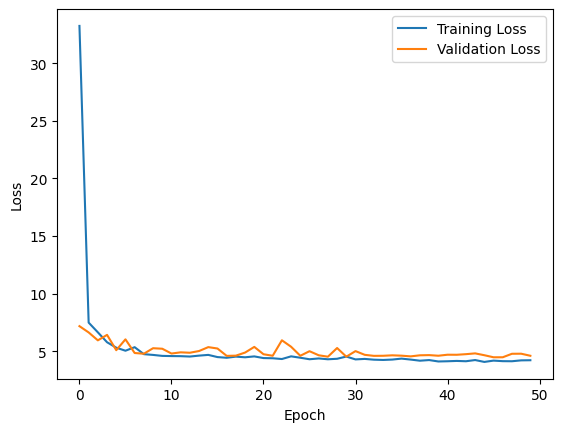

In [66]:
# fetch dataset
# abalone = fetch_ucirepo(id=1)

# # data (as pandas dataframes)
# x = abalone.data.features
# y = abalone.data.targets

# x = pd.concat([x, y], axis=1)
# x1 = x.copy()
# y1 = y.copy()

# Dividir los datos en variables explicativas (X) y variable predictora ('Rings')
y = x1['Rings']  # Variable predictora
X = x1.drop('Rings', axis=1)  # Resto de características

# Identificar las columnas categóricas
categorical_columns = X.select_dtypes(include=['object']).columns

# Aplicar One-Hot Encoding a las columnas categóricas
encoder = OneHotEncoder()
X_encoded = pd.DataFrame(encoder.fit_transform(X[categorical_columns]).toarray(), columns=encoder.get_feature_names_out(categorical_columns))
X_encoded = pd.concat([X.drop(columns=categorical_columns), X_encoded], axis=1)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Normalizar las variables explicativas para mejorar el rendimiento del modelo
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convertir los datos a tensores de TensorFlow y ajustar las dimensiones
X_train = tf.convert_to_tensor(X_train.reshape(X_train.shape[0], X_train.shape[1], 1))
X_test = tf.convert_to_tensor(X_test.reshape(X_test.shape[0], X_test.shape[1], 1))
y_train = tf.convert_to_tensor(y_train.values.reshape(-1, 1))  # Asegurar que tenga la forma adecuada para la red
y_test = tf.convert_to_tensor(y_test.values.reshape(-1, 1))  # Asegurar que tenga la forma adecuada para la red

# Definir el modelo de RNN
model = Sequential([
    SimpleRNN(64, input_shape=(X_train.shape[1], 1), activation='relu'),
    Dense(1)
])

# Compilar el modelo
model.compile(optimizer=Adam(), loss='mse')

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=0)

# Evaluar el modelo en los datos de prueba
loss = model.evaluate(X_test, y_test, verbose=0)
print("Pérdida del modelo RNN:", loss)

# Visualizar la pérdida durante el entrenamiento
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


# 5. Redes Neuronales Artificiales

In [69]:
# Copiamos los datos
data = x.copy()

# Calcular la media de la altura y reemplazar los valores nulos
mean_height = data['Height'].mean()
data['Height'] = data['Height'].replace(to_replace=0, value=mean_height)

# Codificación de 'Sex'
data = pd.get_dummies(data, drop_first=True)

# Separar características y objetivo
feature = data.drop('Rings', axis=1)
target = data['Rings']

X = feature.values
y = target.values

# Convertir etiquetas a categorías (clasificación)
y = to_categorical(y)

# Normalización de los datos
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Definir el modelo en una función
def create_model(input_shape, num_classes):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(input_shape,)),
        Dropout(0.25),
        Dense(num_classes, activation='softmax')  # Salida para la clasificación
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Validación cruzada
kf = KFold(n_splits=3, shuffle=True, random_state=18)
accuracies = []
precisions = []
recalls = []

for train_index, val_index in kf.split(X_scaled):
    X_train, X_val = X_scaled[train_index], X_scaled[val_index]
    y_train, y_val = y[train_index], y[val_index]

    # Convertir a tensores
    X_train = tf.convert_to_tensor(X_train)
    X_val = tf.convert_to_tensor(X_val)
    y_train = tf.convert_to_tensor(y_train)
    y_val = tf.convert_to_tensor(y_val)

    # Crear el modelo
    model = create_model(X_train.shape[1], y_train.shape[1])

    # Entrenar el modelo
    model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), batch_size=32, verbose=0)

    # Evaluar el modelo
    y_val_pred = model.predict(X_val)
    y_val_pred_classes = np.argmax(y_val_pred, axis=1)
    y_val_classes = np.argmax(y_val, axis=1)

    accuracy = accuracy_score(y_val_classes, y_val_pred_classes)
    precision = precision_score(y_val_classes, y_val_pred_classes, average='weighted')
    recall = recall_score(y_val_classes, y_val_pred_classes, average='weighted')

    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)

print(f'Cross-Validation Accuracy: {np.mean(accuracies)}')
print(f'Cross-Validation Precision: {np.mean(precisions)}')
print(f'Cross-Validation Recall: {np.mean(recalls)}')

# Normalizar los datos de prueba
X_test = feature.values  # Asegúrate de tener las características originales de prueba
X_test_scaled = scaler.transform(X_test)

# Convertir a tensores
X_test = tf.convert_to_tensor(X_test_scaled)
y_test = tf.convert_to_tensor(to_categorical(target.values.reshape(-1, 1)))

# Evaluar el modelo en el conjunto de prueba
y_test_pred = model.predict(X_test)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Obtener el número correcto de clases en y_test
num_classes = len(np.unique(y_test_classes))
print(f'Número de clases: {num_classes}')

# Crear los nombres de las clases
target_names = [str(i) for i in range(num_classes)]
print(target_names)

print(classification_report(y_test_classes, y_test_pred_classes, target_names=target_names))


44/44 [==============================] - 0s 1ms/step
Cross-Validation Accuracy: 0.26621888864134574
Cross-Validation Precision: 0.21369380937931526
Cross-Validation Recall: 0.26621888864134574
131/131 [==============================] - 0s 1ms/step
Número de clases: 28
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27']
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00        15
           3       0.00      0.00      0.00        57
           4       0.34      0.53      0.41       115
           5       0.39      0.27      0.32       259
           6       0.33      0.45      0.38       391
           7       0.34      0.29      0.31       568
           8       0.26      0.46      0.33       689
           9       0.23      0.

Los resultados del modelo muestran una precisión de validación cruzada de 0.26, con una precisión y un recall igualmente bajos, indicando que el modelo no está clasificando adecuadamente las 30 clases esperadas, sino solo 21. Las métricas detalladas revelan un rendimiento pobre en la mayoría de las clases, con precisiones individuales bajas y varias clases sin detecciones correctas.

Los resultados deficientes del modelo pueden deberse a varias causas, como el desbalanceo de clases, donde algunas clases están subrepresentadas,  insuficiencia de datos de entrenamiento para ciertas clases.

# 6. Máquina de soporte vectorial

In [71]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import OneHotEncoder

data3 = x.copy()
# Fijar la semilla aleatoria para asegurar la reproducibilidad
np.random.seed(42)

# Dividir los datos en características (X) y etiquetas (y)
X = data3.drop('Rings', axis=1)
y = data3['Rings']

# Identificar las columnas categóricas
categorical_columns = X.select_dtypes(include=['object']).columns

# Aplicar One-Hot Encoding a las columnas categóricas
encoder = OneHotEncoder(drop='first')
X_encoded = pd.DataFrame(encoder.fit_transform(X[categorical_columns]).toarray(), columns=encoder.get_feature_names_out(categorical_columns))
X_encoded = pd.concat([X.drop(columns=categorical_columns), X_encoded], axis=1)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Inicializar el clasificador SVM
svm_classifier = SVC()

# Realizar validación cruzada con 3 conjuntos
scores_accuracy = cross_val_score(svm_classifier, X_train, y_train, cv=3, scoring='accuracy')
scores_precision = cross_val_score(svm_classifier, X_train, y_train, cv=3, scoring='precision_macro')
scores_recall = cross_val_score(svm_classifier, X_train, y_train, cv=3, scoring='recall_macro')

# Calcular promedio de los indicadores de desempeño
avg_accuracy = np.mean(scores_accuracy)
avg_precision = np.mean(scores_precision)
avg_recall = np.mean(scores_recall)

print("Promedio de Accuracy:", avg_accuracy)
print("Promedio de Precision:", avg_precision)
print("Promedio de Recall:", avg_recall)

# Entrenar el modelo final
svm_classifier.fit(X_train, y_train)

# Predecir sobre el conjunto de prueba y calcular métricas
y_pred = svm_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

print("\nMétricas sobre el conjunto de prueba:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)


Promedio de Accuracy: 0.24812818209044626
Promedio de Precision: 0.07806741143772265
Promedio de Recall: 0.08644703059879139

Métricas sobre el conjunto de prueba:
Accuracy: 0.284688995215311
Precision: 0.10557570267625523
Recall: 0.12025473983515453


el modelo de máquina de soporte vectorial (SVM) evaluado para estimar el número de anillos muestra un rendimiento insatisfactorio en términos de precisión y recall. La precisión promedio es baja (alrededor del 8.3%), lo que indica que pocas predicciones positivas son correctas. Además, el recall promedio es aproximadamente 0.085, lo que significa que solo alrededor del 8.5% de las instancias positivas se identifican correctamente. Para mejorar, se debe considerar ajustar los hiperparámetros del SVM y explorar otros algoritmos de aprendizaje automático.